In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import folium
import requests
import json

In [3]:
WP = pd.read_csv('../../data/물놀이/WP.csv', encoding='utf-8')
wp = WP.copy()
wp

,waterplayname,waterplayimgurl,waterplayaddrold,waterplayaddrnew,waterplaytelno,waterplayurl,waterplayname01,waterplayvalue01,waterplayname02,waterplayvalue02,...,waterplayshortvalue01,waterplayscoremean,waterplaywordcloudurl,waterplayscoretoiletmean,waterplayscoreconvmean,waterplayscoredrugmean,waterplayscoremedimean,waterplayscoresafe112mean,waterplayscoresafe119mean,waterplayscoreparkingmean
0,서울식물원 물놀이터,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,강서구 마곡동 812,서울특별시 강서구 마곡동로 161,02-2104-9738,seoul.go.kr,운영기간,2022.7.01.(토)~8.31.(목),운영시간,(매일)11:00~16:40/하루 5회(매회 40분씩)\n휴무일 : 매주 월요일\n...,...,2022.7.01.(토)~8.31.(목),68,NaN,2.280043,3.244495,1.537011,3.126682,2.671342,3.075831,1.779510
1,사랑어린이공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,노원구 상계동 765,서울특별시 노원구 동일로213길 21,02-2116-3975,0,운영기간,2023. 5.8. ~ 8.31.,운영시간,"12:00 ~ 16:40 (40분가동, 20분 휴동)",...,2023. 5.8. ~ 8.31.,71,https://i.ibb.co/88GF0Y8/image.png,2.244367,3.666769,2.235855,3.541158,3.147812,3.453221,1.961768
2,난지 물놀이장분수,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,마포구 상암동 482-182,0,0,https://hangang.seoul.go.kr/www/contents/858.d...,이용기간,7~8월,운영시간,매회 20분. 월요일은 가동 정지\n12:00 ~ 18:00 (매 시간 정각 가동),...,7~8월,58,NaN,2.244367,3.666769,2.235855,3.541158,3.147812,3.453221,1.961768
3,복사꽃어린이공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,마포구 도화동 533,서울특별시 마포구 마포대로4길 11-2,02-3153-9576,0,운영기간,2023. 5. 1.(월) ~ 9. 27.(수),운영시간,10:00~18:00 \n -1일 7~8회(회당 40분 가동),...,2023. 5. 1.(월) ~ 9. 27.(수),58,https://i.ibb.co/qxjvmHs/image.png,2.244367,3.666769,2.235855,3.541158,3.147812,3.453221,1.961768
4,거리공원 바닥분수,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,구로구 구로동 50,서울특별시 구로구 공원로 73-1,02-860-3162,www.guro.go.kr,운영기간,2023.6.5.(월)~8.31.(목),운영시간,"(매일)12:00, 13:00, 16:00, 17:00 / 하루 4회(매회 30분씩)",...,2023.6.5.(월)~8.31.(목),66,NaN,2.244367,3.666769,2.235855,3.541158,3.147812,3.453221,1.961768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,동작주차공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,동작구 동작동 326,서울특별시 동작구 현충로 220,02-820-9585,0,운영기간,"2023.7.21.(금)~8.6.(일)\n(매주 월요일 휴무, 7. 24. / 7...",운영시간,"10:00 ~ 17:00\n(매시 50분운영, 10분 휴식)",...,2023.7.21.(금)~8.6.(일),65,NaN,2.280043,3.244495,1.537011,3.126682,2.671342,3.075831,1.779510
136,광나루 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,강동구 암사동 637-6,서울특별시 강동구 선사로 83-106,02-470-9561,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,가. 허용기간 : 2023.6.23.(금)~8.20.(일),63,https://i.ibb.co/RzV1CR9/image.png,0.620595,2.997100,2.290670,3.265002,2.396693,2.790173,0.172904
137,뚝섬 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,광진구 자양동 112,0,02-452-5955,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,가. 허용기간 : 2023.6.23.(금)~8.20.(일),60,https://i.ibb.co/VvPmpzR/image.png,0.620595,2.997100,2.290670,3.265002,2.396693,2.790173,0.172904
138,여의도 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,영등포구 여의도동 82-9,0,02-785-0478,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,가. 허용기간 : 2023.6.23.(금)~8.20.(일),49,https://i.ibb.co/QF6pkLm/image.png,0.620595,2.997100,2.290670,3.265002,2.396693,2.790173,0.172904


In [4]:
wp["waterplaysigngu"] = wp["waterplayaddrold"].apply(lambda x: x.split()[0])
wp["waterplaysigngu"]

0       강서구
1       노원구
2       마포구
3       마포구
4       구로구
       ... 
135     동작구
136     강동구
137     광진구
138    영등포구
139     서초구
Name: waterplaysigngu, Length: 140, dtype: object

In [5]:
# 행정구역별 물놀이장 개수
signgu_counts = wp["waterplaysigngu"].value_counts()

# 행정구역별 물놀이장 점수 평균 
signgu_scores = wp["waterplayscorefaci"].groupby(wp["waterplaysigngu"]).mean()

# 병합
signgu_df = pd.concat([signgu_counts, signgu_scores], axis=1)
signgu_df.columns = ["counts", "score"]
signgu_df

,counts,score
중랑구,19,69.684211
강북구,14,71.285714
노원구,13,71.000000
금천구,13,68.769231
마포구,12,58.250000
양천구,11,76.909091
종로구,9,87.666667
광진구,7,60.285714
구로구,6,66.166667
도봉구,6,72.666667


## 점수 분포 시각화

<Axes: xlabel='waterplayscorefaci', ylabel='Density'>

Text(0.5, 1.0, '물놀이장 편의 점수 분포')

Text(0, 0.5, '비율')

Text(0.5, 0, '물놀이장 편의 점수')

([<matplotlib.axis.XTick at 0x22e6ce5ba00>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100')])

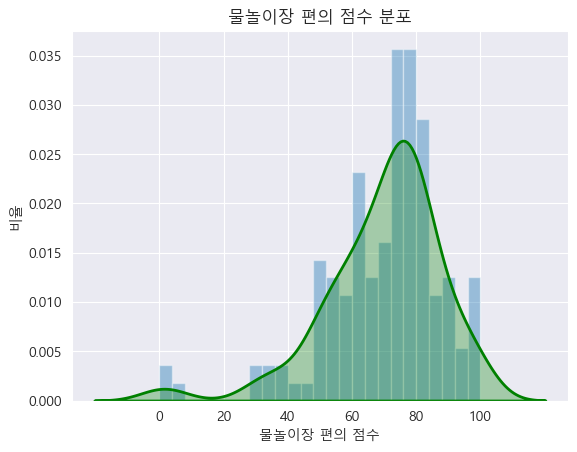

In [55]:
# 한글 깨짐 해결
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

sns.distplot(
    wp["waterplayscorefaci"],
    bins=25,
    kde_kws={"color" : "g", "alpha" : 0.3, "linewidth" : 2, "shade" : True},
)
sns.set_style('darkgrid')

plt.title("물놀이장 편의 점수 분포")
plt.ylabel("비율")
plt.xlabel("물놀이장 편의 점수")
plt.xticks(list(range(0, 110, 20)))

plt.show()

## 행정구역별 물놀이장 개수 비교

In [7]:
data = signgu_df["counts"]

In [8]:
data

중랑구     19
강북구     14
노원구     13
금천구     13
마포구     12
양천구     11
종로구      9
광진구      7
구로구      6
도봉구      6
서대문구     5
성동구      5
영등포구     5
중구       3
동대문구     3
서초구      3
동작구      2
강서구      2
송파구      1
강동구      1
Name: counts, dtype: int64

### 막대그래프 시각화

Text(0.5, 1.0, '행정구역 별 물놀이장 개수')

Text(0.5, 0, '물놀이장 개수')

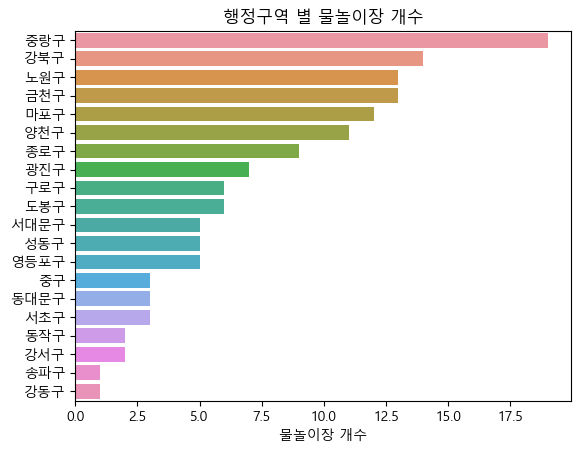

In [9]:
# 한글 깨짐 해결
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

bar = sns.barplot(x = data.values,
            y = data.index
           )
plt.title("행정구역 별 물놀이장 개수")
plt.xlabel("물놀이장 개수")

plt.show()

### 지도 시각화

In [10]:
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [11]:
bins = list(data.quantile([0, 0.25, 0.5, 0.75, 1]))


m = folium.Map(
    location=[37.559819, 126.963905],
    zoom_start=11
)

# 배경지도 타일 설정하기
vworld_key = "DE72189A-9146-3719-A5BE-804E2E11D4E6"
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=data.sort_index(), 
             fill_color='Blues', 
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="행정구역 별 물놀이장 개수", 
             bins=bins
            )
m

## 행정구역별 물놀이장 점수 평균 비교

In [12]:
data = signgu_df['score']

<Axes: >

Text(0.5, 1.0, '행정구역 별 물놀이장 점수 평균')

Text(0.5, 0, '물놀이장 점수 평균')

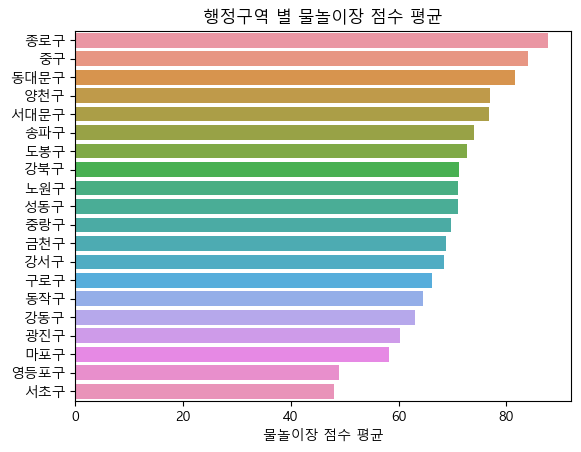

In [13]:
# 한글 깨짐 해결
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

sns.barplot(x = data.sort_values(ascending=False).values,
            y = data.sort_values(ascending=False).index
           )

plt.title("행정구역 별 물놀이장 점수 평균")
plt.xlabel("물놀이장 점수 평균")
plt.show()

In [14]:
bins = list(data.quantile([0, 0.25, 0.5, 0.75, 1]))


m = folium.Map(
    location=[37.559819, 126.963905],
    zoom_start=11
)

# 배경지도 타일 설정하기
vworld_key = "DE72189A-9146-3719-A5BE-804E2E11D4E6"
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=data.sort_index(), 
             fill_color='Blues', 
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="행정구역 별 물놀이장 점수 평균", 
             bins=bins
            )
m

In [15]:
# !pip install pyppeteer

In [16]:
from folium import utilities
from pyppeteer import launch

# 만든 지도를 png 파일로 캡쳐해서 저장하는 함수
async def map_to_png(target, m):
    html = m.get_root().render()
    browser = await launch(headless=True)

    page = await browser.newPage()
    with utilities.temp_html_filepath(html) as fname:
        await page.goto('file://{path}'.format(path=fname))

    img_data = await page.screenshot({'path': f'../../capture/{target}.png', 'fullPage': 'true', })
    await browser.close()

In [17]:
# 지도 시각화 사진 파일로 저장
file_name = "시각화 행정구역별 물놀이장 점수 평균 비교"
await map_to_png(file_name, m)

## 서울시 Top 10 물놀이장

In [18]:
wp[["waterplayname", "waterplayscorefaci"]].sort_values("waterplayscorefaci", ascending=False).head(10)

,waterplayname,waterplayscorefaci
41,터널분수,100
30,명량분수,100
71,한글분수,100
25,희망어린이공원 계류,98
48,샘물탁자,98
60,바닥우물,97
69,삼양마을마당 바닥분수,96
5,어린이꿈공원,95
61,삼개어린이공원,95
92,시간의벽천,94


## 행정구역 내 물놀이장 점수 Top 5

In [19]:
for signgu in wp["waterplaysigngu"].unique():
    df = wp[wp["waterplaysigngu"] == signgu]
    
    print(signgu, "내 물놀이장 점수 Top 5")
    
    df[["waterplayname", "waterplayscorefaci"]].sort_values("waterplayscorefaci", ascending=False).head(5)

강서구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
0,서울식물원 물놀이터,86
20,(공공예약)서울물재생체험관,51


노원구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
105,등나무문화공원,91
126,삿갓봉공원,86
80,걷고싶은녹화거리,83
1,사랑어린이공원,76
18,들 국 화,73


마포구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
61,삼개어린이공원,95
3,복사꽃어린이공원,90
37,대흥어린이공원,83
90,공덕소공원,81
101,양화어린이공원,80


구로구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
57,서해안로 주민쉼터 바닥분수,81
4,거리공원 바닥분수,79
125,덕의근린공원 물놀이장,75
134,솔길어린이공원 물놀이장,73
44,궁동생태공원 바닥분수,50


성동구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
5,어린이꿈공원,95
89,청계천 마장어린이꿈공원 물놀이장,78
42,살곶이 물놀이장,63
35,서울숲바닥분수,61
99,이촌 벽천분수,58


도봉구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
74,수유교 바닥분수,82
6,방학사계광장,81
110,둘리쌍문근린공원,79
97,신도봉교 바닥분수,73
111,다락원체육공원,63


중랑구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
77,사가정역마을마당,86
131,망우역바닥분수,81
109,둑방공원,81
119,면목역공원,78
40,샘터어린이공원,74


양천구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
64,파리근린공원 음악분수,89
114,파리근린공원 바닥분수,89
26,백석어린이공원 물놀이터,81
91,경인어린이공원 물놀이터,80
8,반곡어린이공원 물놀이터,79


강북구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
25,희망어린이공원 계류,98
69,삼양마을마당 바닥분수,96
33,수유일어린이공원 바닥분수,87
121,쌍한교 바닥분수,82
51,벌말어린이공원 물놀이장,79


서대문구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
32,문화촌어린이공원,82
70,가재울어린이공원,77
14,복주산근린공원 \n바닥분수,76
11,중앙근린공원,75
27,북성어린이공원\n바닥분수,74


송파구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
12,성내천 물놀이장,74


금천구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
112,부장천어린이공원,85
17,소망어린이공원,84
120,은행어린이공원,80
87,금나래중앙공원,78
53,해태어린이공원,77


서초구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
22,매헌시민의숲 바닥분수 및 계류,67
139,잠원 수영장,46
38,반포 달빛무지개분수,31


광진구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
66,중곡동 중랑천 물놀이장,81
137,뚝섬 수영장,65
28,뚝섬 벽천분수,62
95,뚝섬 음악분수,62
24,뚝섬 조형물분수,52


종로구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
30,명량분수,100
41,터널분수,100
71,한글분수,100
48,샘물탁자,98
60,바닥우물,97


중구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
62,다산어린이공원,90
49,동화어린이공원,83
96,꿈누리어린이공원(시설 고장으로 페쇄),79


영등포구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
103,여의도 물빛광장분수,56
138,여의도 수영장,55
93,여의도 수상분수,50
115,여의도 안개분수,50
56,양화 물놀이장,34


동대문구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
82,용두근린공원 바닥분수,90
106,용두5구역 어린이공원 바닥분수,79
83,장안근린공원 바닥분수,76


동작구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
135,동작주차공원,76
108,현충근린공원 물놀이장,53


강동구 내 물놀이장 점수 Top 5


,waterplayname,waterplayscorefaci
136,광나루 수영장,63


## Anova 분석
- 각 행정구역 별 점수 평균 차이가 유의한가
- 물놀이장이 너무 적어 불가능

## 방사형 차트 예시

In [20]:
def draw_laderchart(i):
    categories = ["화장실 및 수유실", "편의점", "드럭스토어", "의료시설", "경찰서", "소방서", "주차장"]
    categories = [*categories, categories[0]]

    scores = (wp.iloc[i][[
        'waterplayscoretoilet',
        'waterplayscoreconv',
        'waterplayscoredrug',
        'waterplayscoremedi',
        'waterplayscoresafe112',
        'waterplayscoresafe119',
        'waterplayscoreparking',
    ]])
    scores = [*scores, scores[0]]

    label_loc = np.linspace(start=0, stop=2*np.pi, num=len(scores))

    ax = plt.subplot(polar=True)
    plt.xticks(label_loc, labels=categories)
    ax.plot(label_loc, scores, linestyle='dashed', color='lightcoral')
    ax.fill(label_loc, scores, color='lightcoral', alpha=0.3)
    plt.show()

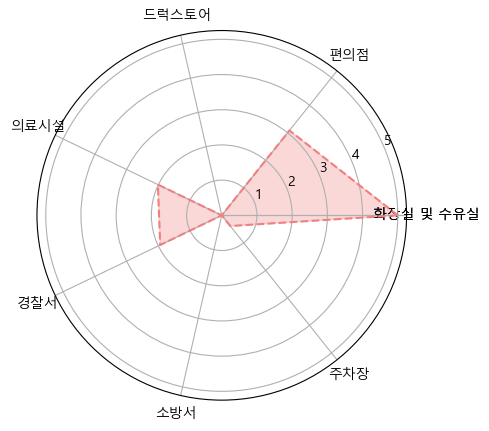

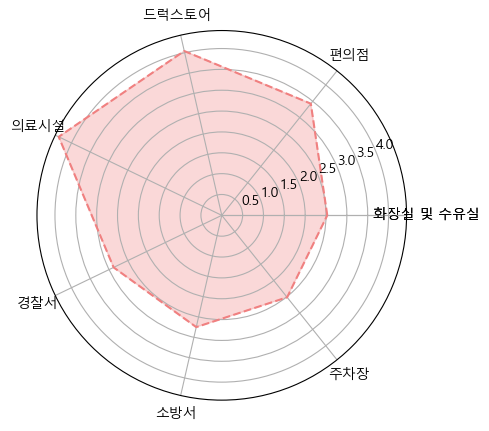

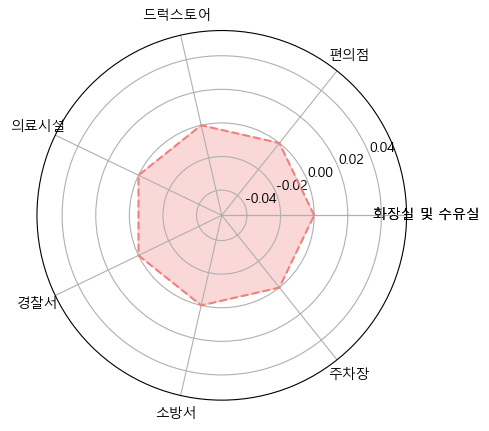

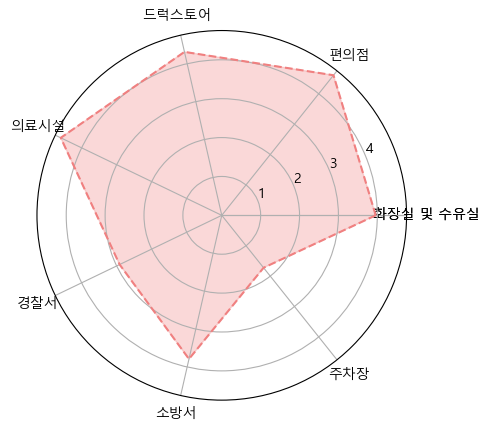

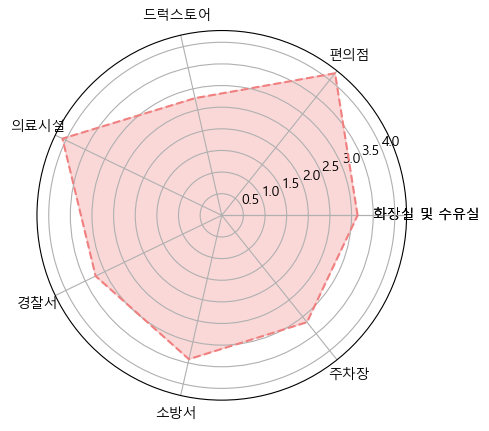

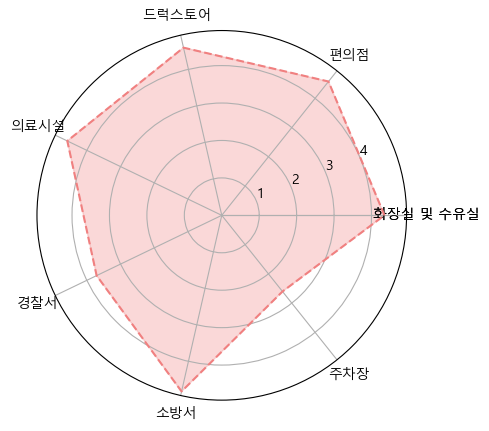

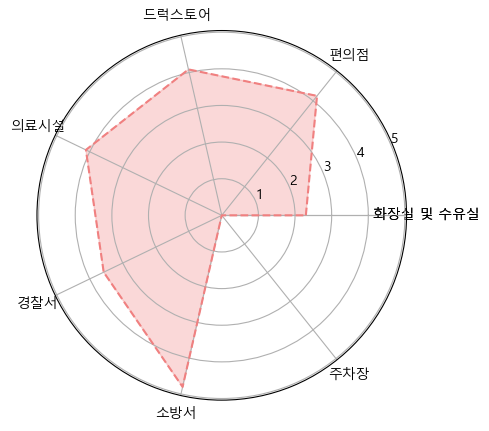

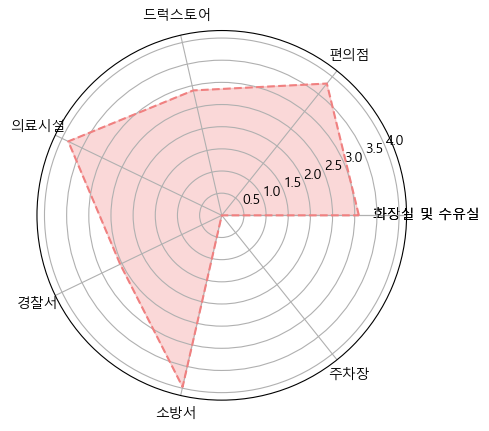

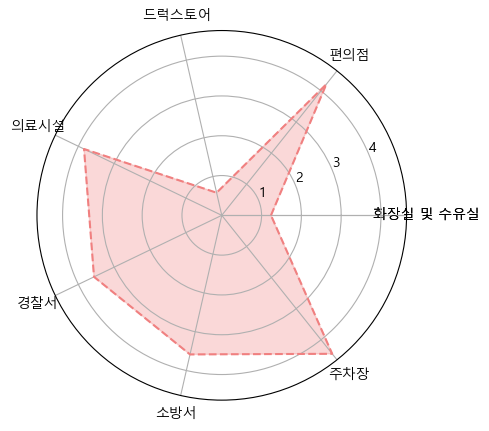

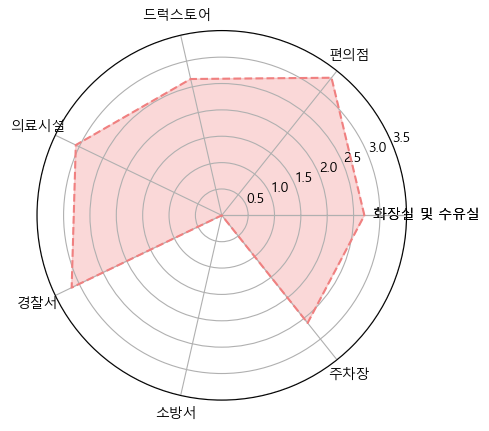

In [21]:
for i in range(10):
    draw_laderchart(i)

## 물놀이 시설과 해당 행정구역 내 물놀이장의 점수 평균 비교 예시

<Axes: >

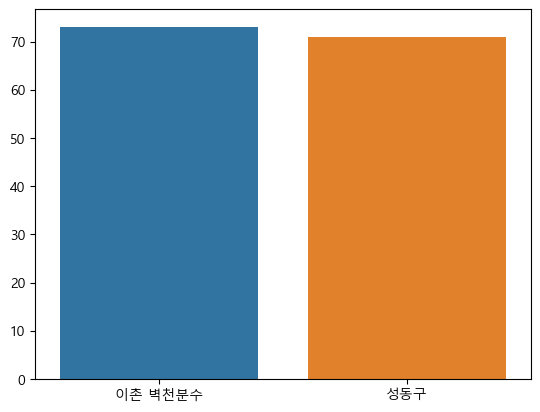

In [22]:
sns.barplot(
    x = ["이촌 벽천분수", "성동구", ],
    y = [wp['waterplayscorefaci'][100], float(signgu_df[signgu_df.index == '성동구']['score']), ]
)